# Latar Belakang

Sebuah perusahaan fiktif bernama SaaS menjual software sales dan marketing ke perusahaan lain (B2B). 

Sebuah perusahaan yang bergerak di bidang penjualan software ini memberikan diskon untuk konsumennya dengan harapan dapat berdampak pada peningkatan performa perusahaan misal pada sales atau profitnya. Selama diskon diterapkan terjadi perubahan namun tidak diketahui pasti apakah perubahan tersebut signifikan untuk perusahaan.

## Pernyataan Masalah
Perusahaan ingin mencari tahu **perubahan tren penjualan selama diskon diterapkan**. Informasi ini akan membantu perusahaan untuk mengetahui efektifitas program diskon yang diberikan sehingga dapat diketahui secara lebih baik apa saja dampaknya untuk perusahaan, sebagai dasar agar alokasi biaya diskon lebih tepat, tidak terlalu besar maupun terlalu sedikit. 

Apakah diskon ini meningkatkan transaksi tiap pelanggan?

Sebagai seorang *data analyst*, saya akan mencoba menjawab pertanyaan berikut:
**Bagaimana tren penjualan selama diskon berlangsung? Apakah diskon yang diberikan sudah efektif?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists?taskId=3015). 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from scipy.stats import mstats
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi seluruh informasi terkait detail atas transaksi penjualan yang dilakukan oleh SaaS. Ada 19 kolom di dalam dataset SaaS-Sales, yaitu:  

Row ID: A unique identifier for each transaction. 

Order ID: A unique identifier for each order.
 
Order Date: The date when the order was placed
. 
Date Key: A numerical representation of the order date (YYYYMMDD
). 
Contact Name: The name of the person who placed the ord
er. 
Country: The country where the order was pla
ced. 
City: The city where the order was pl

ed. 
 Region: The region where the order was p
 laced. 
Subregion: The subregion where the order was 
placed. 
Customer: The name of the company that placed th
e order. 
Customer ID: A unique identifier for each 
customer. 
Industry: The industry the customer b
elongs to. 
Segment: The customer segment (SMB, Strategic, Enterpr
ise, etc.). 
Product: The product 
was ordered. 
License: The license key for
 the product. 
Sales: The total sales amount for th
e transaction. 
Quantity: The total number of items in t
he transaction. 
Discount: The discount applied to 
the transaction. 
Profit: The profit frm the transaction
hr_analitycs.

Berikut 5 baris teratas dan terbawah dari dataset SaaS-Sales.

In [24]:
#df.to_excel('saas.xlsx', index=False)

In [2]:
df=pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset SaaS-Sales

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

In [262]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


Lalu kita tampilkan data unik apa saja yang ada di setiap kolom. Yang akan membantu memahami lebih lanjut bentuk data setiap kolom dan ketersediaannya 

In [4]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


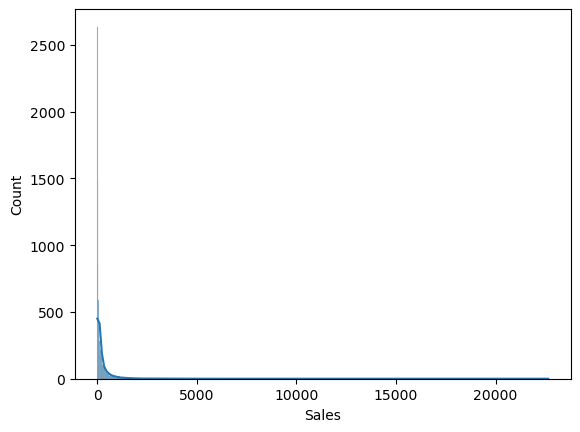

In [263]:
sns.histplot(df['Sales'], kde=True)
plt.show()

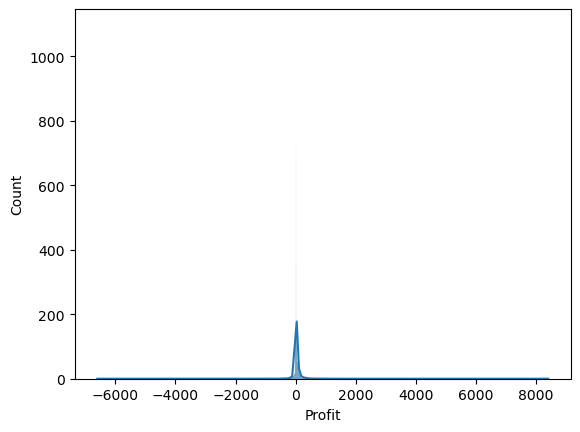

In [36]:
sns.histplot(df['Profit'], kde=True)
plt.show()

Secara umum, kita bisa melihat bahwa:
* terdapat 19 kolom dan 9994 baris
* tidak ada missing value namun terdapat nilai nol pada kolom `discount`
* kolom `Row ID`, `License` hanya berupa id dari baris dan license untuk kebutuhan kode produk konsumen sehingga tidak relevan dalam analisis, jadi bisa dihapus
* Data sales dan profit sangat skewed sehingga butuh dilakukan treatment agar variabilitas data oleh outlier yang ekstrem berkurang dan analisis statistik atau model prediktif menjadi lebih stabil dan reliabel

In [264]:
q1 = df['Sales'].describe()['25%']
df['Sales'].describe()['50%']
q3 = df['Sales'].describe()['75%']
iqr = q3 - q1

In [265]:
#Jumlah outlier

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
outliers

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
7,8,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
10,11,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,43NZ37VE2D,1706.1840,9,0.20,85.3092
11,12,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,JG14MOU94R,911.4240,4,0.20,68.3568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,9932,AMER-2021-104948,11/13/2021,20211113,Kimberly Newman,United States,Anaheim,AMER,NAMER,Amazon,1004,Tech,SMB,Marketing Suite,3D56KMLTYI,683.3320,4,0.15,-40.1960
9942,9943,AMER-2020-143371,12/28/2020,20201228,Carol Forsyth,United States,San Francisco,AMER,NAMER,Nestle,1089,Consumer Products,SMB,Marketing Suite - Gold,UPQPITMHDF,998.8200,9,0.00,29.9646
9947,9948,APJ-2023-121559,6/2/2023,20230602,Harry McGrath,India,Delhi,APJ,IND,Valero Energy,1093,Energy,Strategic,FinanceHub,ZTX5WHU4ZQ,1925.8800,6,0.00,539.2464
9948,9949,APJ-2023-121559,6/2/2023,20230602,Harry McGrath,India,Delhi,APJ,IND,Valero Energy,1093,Energy,Strategic,OneView,ZGTMROAYTX,2405.2000,8,0.00,793.7160


Jumlah outlier sangat banyak lebih dari 10% data dan meskipun outlier ini merupakan data sales yang valid sehingga kita tidak bisa hanya menghapusnya.
Saya akan menggunakan Winsorize untuk membatasi outlier yang ada ke nilai tertentu untuk mengurangi variabilitas data yang disebabkan oleh outlier ekstrem

In [5]:
#Data setelah outlier ditreat

df['Sales_winsorized'] = mstats.winsorize(df['Sales'], limits=[0.05, 0.05])
df['Profit_winsorized'] = mstats.winsorize(df['Profit'], limits=[0.05, 0.05])
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Sales_winsorized,Profit_winsorized
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,261.9600,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,731.9400,168.4704
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,14.6200,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,957.5775,-53.0720
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,22.3680,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,...,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028,25.2480,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332,91.9600,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932,258.5760,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200,29.6000,13.3200


In [244]:
#df_cleaned.to_excel('df_cleaned.xlsx', index=False)

Text(0.5, 1.0, 'Distribusi Sales Setelah Winsorizing')

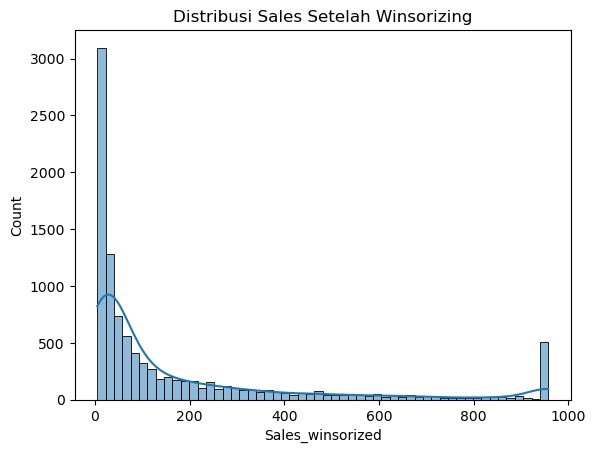

In [267]:
sns.histplot(df['Sales_winsorized'], kde=True)
plt.title('Distribusi Sales Setelah Winsorizing')

Text(0.5, 1.0, 'Distribusi Profit Setelah Winsorizing')

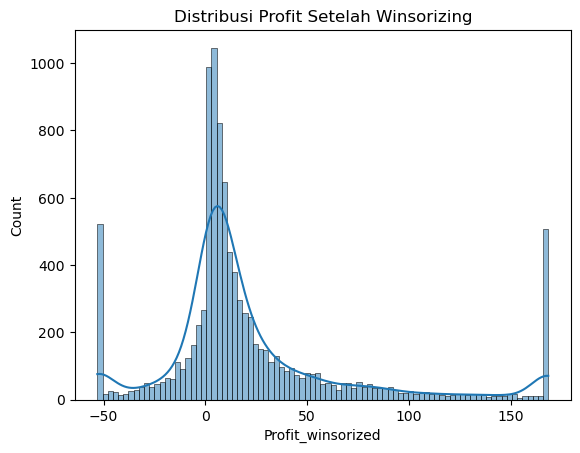

In [38]:
sns.histplot(df['Profit_winsorized'], kde=True)
plt.title('Distribusi Profit Setelah Winsorizing')

### Missing Value

In [237]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Row ID               0.0
Order ID             0.0
Order Date           0.0
Date Key             0.0
Contact Name         0.0
Country              0.0
City                 0.0
Region               0.0
Subregion            0.0
Customer             0.0
Customer ID          0.0
Industry             0.0
Segment              0.0
Product              0.0
License              0.0
Sales                0.0
Quantity             0.0
Discount             0.0
Profit               0.0
Sales_winsorized     0.0
Profit_winsorized    0.0
dtype: float64

In [18]:
# Tidak ada missing value pada data 

In [6]:
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Sales_winsorized,Profit_winsorized
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,261.9600,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,731.9400,168.4704
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,14.6200,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,957.5775,-53.0720
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,22.3680,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,...,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028,25.2480,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332,91.9600,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932,258.5760,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200,29.6000,13.3200


In [48]:
df_new = df.copy()
df_new.rename(columns={'Sales_winsorized': 'Sales2', 'Profit_winsorized': 'Profit2' }, inplace=True)
df_cleaned = df_new.drop(columns=['Row ID', 'License', 'Contact Name', 'Date Key', 'Segment'])
df_cleaned

,Order ID,Order Date,Country,City,Region,Subregion,Customer,Customer ID,Industry,Product,Sales,Quantity,Discount,Profit,Sales2,Profit2
0,EMEA-2022-152156,11/9/2022,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,Marketing Suite,261.9600,2,0.00,41.9136,261.9600,41.9136
1,EMEA-2022-152156,11/9/2022,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,FinanceHub,731.9400,3,0.00,219.5820,731.9400,168.4704
2,AMER-2022-138688,6/13/2022,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,FinanceHub,14.6200,2,0.00,6.8714,14.6200,6.8714
3,EMEA-2021-108966,10/11/2021,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,ContactMatcher,957.5775,5,0.45,-383.0310,957.5775,-53.0720
4,EMEA-2021-108966,10/11/2021,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,Marketing Suite - Gold,22.3680,2,0.20,2.5164,22.3680,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,1/22/2020,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SaaS Connector Pack,25.2480,3,0.20,4.1028,25.2480,4.1028
9990,AMER-2023-121258,2/27/2023,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SaaS Connector Pack,91.9600,2,0.00,15.6332,91.9600,15.6332
9991,AMER-2023-121258,2/27/2023,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,Site Analytics,258.5760,2,0.20,19.3932,258.5760,19.3932
9992,AMER-2023-121258,2/27/2023,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,Support,29.6000,4,0.00,13.3200,29.6000,13.3200


In [44]:
# Konversi kolom 'Order Date' ke tipe datetime
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order ID     9994 non-null   object        
 1   Order Date   9994 non-null   datetime64[ns]
 2   Country      9994 non-null   object        
 3   City         9994 non-null   object        
 4   Region       9994 non-null   object        
 5   Subregion    9994 non-null   object        
 6   Customer     9994 non-null   object        
 7   Customer ID  9994 non-null   int64         
 8   Industry     9994 non-null   object        
 9   Product      9994 non-null   object        
 10  Quantity     9994 non-null   int64         
 11  Discount     9994 non-null   float64       
 12  Sales2       9994 non-null   float64       
 13  Profit2      9994 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [9]:
df_cleaned['Tanggal'] = df_cleaned['Order Date'].dt.date  # Extracting just the date
df_cleaned['Bulan'] = df_cleaned['Order Date'].dt.strftime('%Y-%m')  # Extracting year-month format
df_cleaned['Tahun'] = df_cleaned['Order Date'].dt.year  # Extracting the year

# Grouping by year, month, and day and summing the specified columns
grouped = df_cleaned.groupby(['Tahun', 'Bulan', 'Tanggal'])[['Discount', 'Sales2', 'Quantity', 'Profit2']].sum().reset_index()
grouped

,Tahun,Bulan,Tanggal,Discount,Sales2,Quantity,Profit2
0,2020,2020-01,2020-01-04,0.20,16.4480,2,5.5512
1,2020,2020-01,2020-01-05,1.20,289.5000,8,-54.2873
2,2020,2020-01,2020-01-06,0.20,19.5360,3,4.8840
3,2020,2020-01,2020-01-07,0.00,2790.8575,30,638.4556
4,2020,2020-01,2020-01-08,1.40,87.1580,10,-71.3245
...,...,...,...,...,...,...,...
1232,2023,2023-12,2023-12-27,0.90,816.4420,12,61.1202
1233,2023,2023-12,2023-12-28,0.60,177.6360,6,-31.9742
1234,2023,2023-12,2023-12-29,4.12,1669.6628,64,211.0956
1235,2023,2023-12,2023-12-30,0.40,2665.2715,41,498.8658


### Data Analysis

Mari kita lihat secara umum hubungan discount dengan beberapa variabel yaitu quantity, sales, product

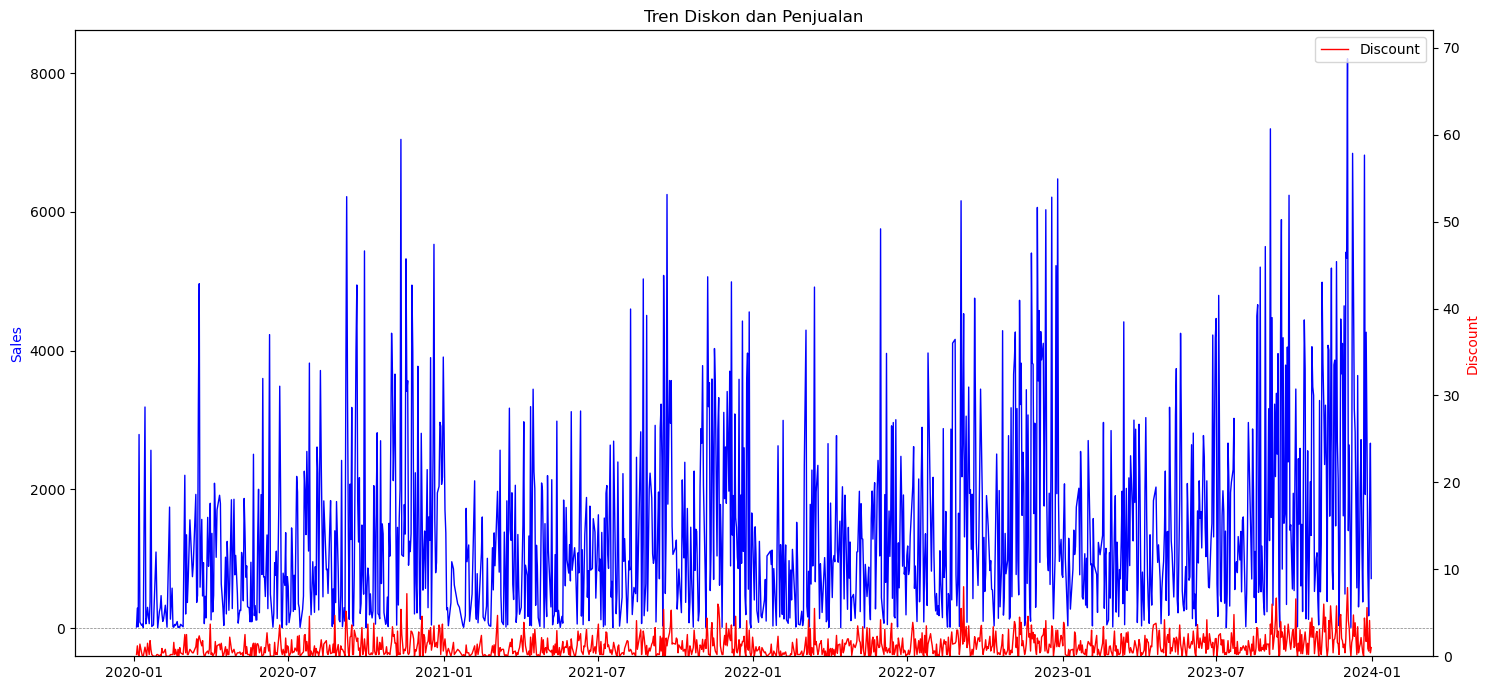

In [288]:
plt.figure(figsize=(15, 7))

# Plot line chart untuk data Sales (sumbu kiri)
plt.plot(grouped['Tanggal'], grouped['Sales2'], color='blue', linewidth=1, label='Sales2')
plt.ylabel('Sales', color='blue')

# Menambahkan garis horizontal pada sumbu kiri di y=0
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Menambahkan sumbu kedua untuk data Discount (sumbu kanan)
plt.twinx()
plt.plot(grouped['Tanggal'], grouped['Discount'], color='red', linewidth=1, label='Discount')
plt.ylabel('Discount', color='red')

# Menetapkan rentang nilai pada sumbu y untuk masing-masing plot
plt.ylim(0, grouped['Discount'].max() * 9)

# Menambahkan judul dan label
plt.title('Tren Diskon dan Penjualan')
plt.xlabel('Tahun-Bulan')
plt.xticks(rotation=0)

# Menampilkan legend untuk setiap sumbu
lines, labels = plt.gca().get_legend_handles_labels()
plt.legend(lines, labels, loc='best')

# Menampilkan chart
plt.tight_layout()
plt.show()

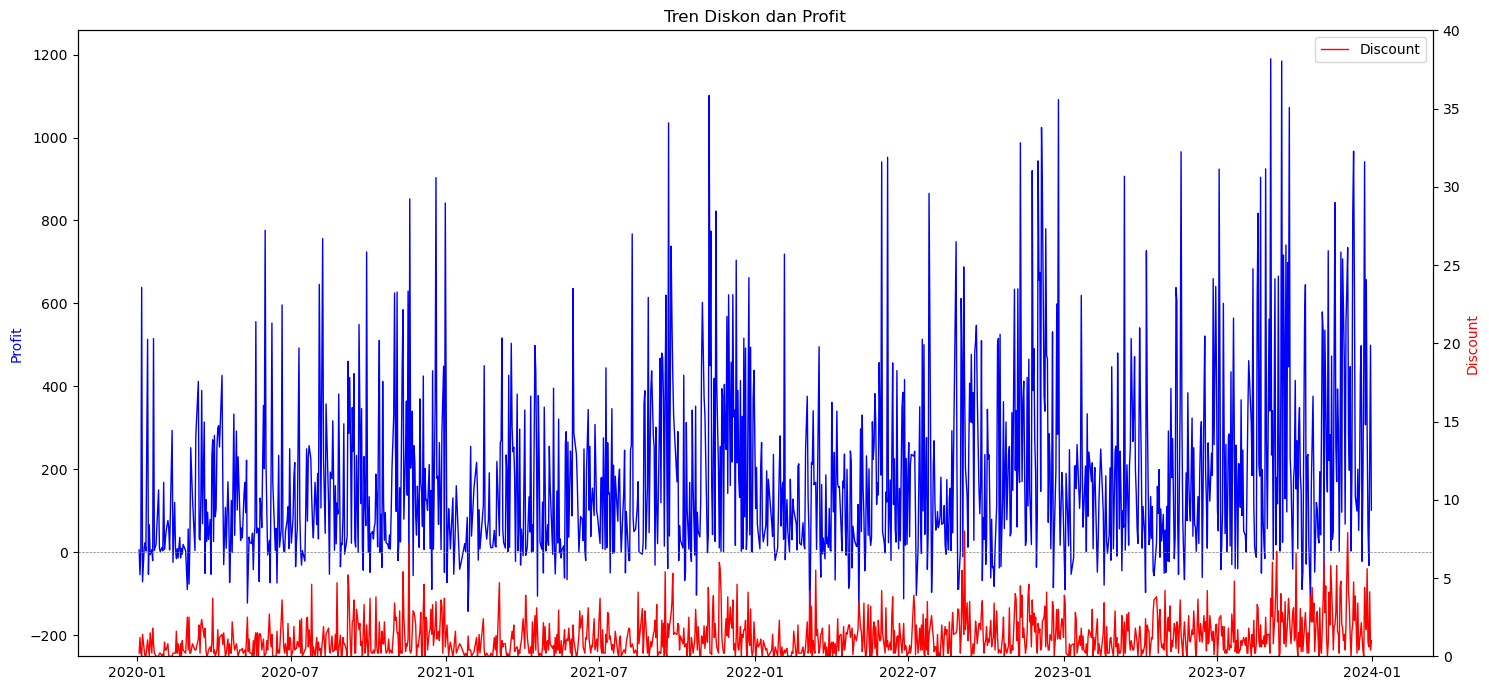

In [10]:
plt.figure(figsize=(15, 7))

# Plot line chart untuk data Sales (sumbu kiri)
plt.plot(grouped['Tanggal'], grouped['Profit2'], color='blue', linewidth=1, label='Profit2')
plt.ylabel('Profit', color='blue')

# Menambahkan garis horizontal pada sumbu kiri di y=0
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Menambahkan sumbu kedua untuk data Discount (sumbu kanan)
plt.twinx()
plt.plot(grouped['Tanggal'], grouped['Discount'], color='red', linewidth=1, label='Discount')
plt.ylabel('Discount', color='red')

# Menetapkan rentang nilai pada sumbu y untuk masing-masing plot
plt.ylim(0, grouped['Discount'].max() * 5)

# Menambahkan judul dan label
plt.title('Tren Diskon dan Profit')
plt.xlabel('Tahun-Bulan')
plt.xticks(rotation=0)

# Menampilkan legend untuk setiap sumbu
lines, labels = plt.gca().get_legend_handles_labels()
plt.legend(lines, labels, loc='best')

# Menampilkan chart
plt.tight_layout()
plt.show()

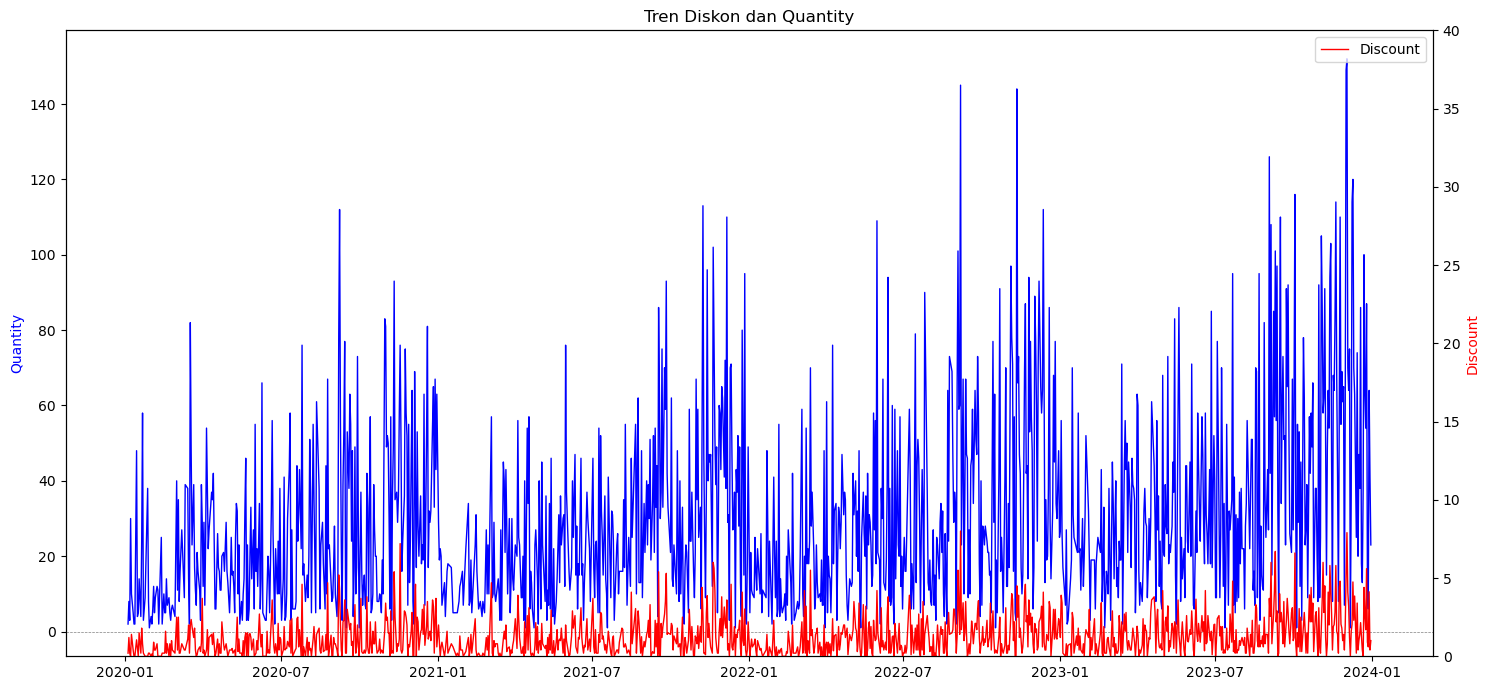

In [287]:
plt.figure(figsize=(15, 7))

# Plot line chart untuk data Sales (sumbu kiri)
plt.plot(grouped['Tanggal'], grouped['Quantity'], color='blue', linewidth=1, label='Quantity')
plt.ylabel('Quantity', color='blue')

# Menambahkan garis horizontal pada sumbu kiri di y=0
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Menambahkan sumbu kedua untuk data Discount (sumbu kanan)
plt.twinx()
plt.plot(grouped['Tanggal'], grouped['Discount'], color='red', linewidth=1, label='Discount')
plt.ylabel('Discount', color='red')

# Menetapkan rentang nilai pada sumbu y untuk masing-masing plot
plt.ylim(0, grouped['Discount'].max() * 5)

# Menambahkan judul dan label
plt.title('Tren Diskon dan Quantity')
plt.xlabel('Tahun-Bulan')
plt.xticks(rotation=0)

# Menampilkan legend untuk setiap sumbu
lines, labels = plt.gca().get_legend_handles_labels()
plt.legend(lines, labels, loc='best')

# Menampilkan chart
plt.tight_layout()
plt.show()

Terlihat bahwa volatilitas discount dibandingkan dengan sales dan profit, discount tidak mengalami naik turun sedrastis sales dan profit.
Lalu pada grafik discount dan quantity lebih terlihat polanya hampir sama.

## Uji Statistik

In [12]:
from scipy.stats import shapiro
from scipy.stats import ttest_ind

In [14]:
df_update=pd.read_excel('df_cleaned.xlsx')
df_update

,Order ID,Order Date,Country,City,Region,Subregion,Customer,Customer ID,Industry,Product,Sales,Quantity,Discount,Profit,Sales2,Profit2
0,EMEA-2022-152156,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,Marketing Suite,261.9600,2,0.00,41.9136,261.9600,41.9136
1,EMEA-2022-152156,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,FinanceHub,731.9400,3,0.00,219.5820,731.9400,168.4704
2,AMER-2022-138688,2022-06-13,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,FinanceHub,14.6200,2,0.00,6.8714,14.6200,6.8714
3,EMEA-2021-108966,2021-10-11,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,ContactMatcher,957.5775,5,0.45,-383.0310,957.5775,-53.0720
4,EMEA-2021-108966,2021-10-11,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,Marketing Suite - Gold,22.3680,2,0.20,2.5164,22.3680,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SaaS Connector Pack,25.2480,3,0.20,4.1028,25.2480,4.1028
9990,AMER-2023-121258,2023-02-27,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SaaS Connector Pack,91.9600,2,0.00,15.6332,91.9600,15.6332
9991,AMER-2023-121258,2023-02-27,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,Site Analytics,258.5760,2,0.20,19.3932,258.5760,19.3932
9992,AMER-2023-121258,2023-02-27,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,Support,29.6000,4,0.00,13.3200,29.6000,13.3200


Karena kita ingin melihat performa discount maka seluruh transaksi tanpa diskon dihapus

In [25]:
df_discount = df_update[df_update['Discount'] != 0.00]
df_discount

,Order ID,Order Date,Country,City,Region,Subregion,Customer,Customer ID,Industry,Product,Sales,Quantity,Discount,Profit,Sales2,Profit2
3,EMEA-2021-108966,2021-10-11,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,ContactMatcher,957.5775,5,0.45,-383.0310,957.5775,-53.0720
4,EMEA-2021-108966,2021-10-11,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,Marketing Suite - Gold,22.3680,2,0.20,2.5164,22.3680,2.5164
7,AMER-2020-115812,2020-06-09,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,Site Analytics,907.1520,6,0.20,90.7152,907.1520,90.7152
8,AMER-2020-115812,2020-06-09,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,ContactMatcher,18.5040,3,0.20,5.7825,18.5040,5.7825
10,AMER-2020-115812,2020-06-09,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,ContactMatcher,1706.1840,9,0.20,85.3092,957.5775,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,AMER-2022-103674,2022-12-07,United States,New York City,AMER,NAMER,CVS Health,1026,Retail,ContactMatcher,13.3760,4,0.20,4.6816,13.3760,4.6816
9979,AMER-2022-103674,2022-12-07,United States,New York City,AMER,NAMER,CVS Health,1026,Retail,ContactMatcher,437.4720,14,0.20,153.1152,437.4720,153.1152
9981,AMER-2023-163566,2023-08-04,Mexico,Mexico City,AMER,LATAM,Aviva,1006,Finance,FinanceHub,16.5200,5,0.20,5.3690,16.5200,5.3690
9989,EMEA-2020-110422,2020-01-22,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SaaS Connector Pack,25.2480,3,0.20,4.1028,25.2480,4.1028


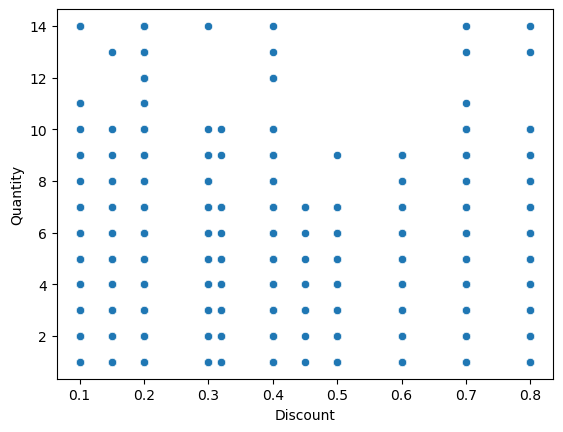

In [22]:
sns.scatterplot(x = df_discount['Discount'], y = df_discount['Quantity']);

#pertama kita visualisasikan dengan scatterplot untuk melihat apakah data linear. Terlihat data tidak linier maka digunakan metode spearman

In [23]:
df_discount['Discount'].corr(df_discount['Quantity'], method= 'spearman')

0.03288537676976702

Hasil uji korelasi menunjukkan korelasi hubungan negatif yang berarti kenaikan discount menyebabkan penurunan pada quantity namun karena in korelasi kita tidak dapat mengetahui variabel apa mempengaruhi apa. Serta hasil menunjukkan korelasi lemah

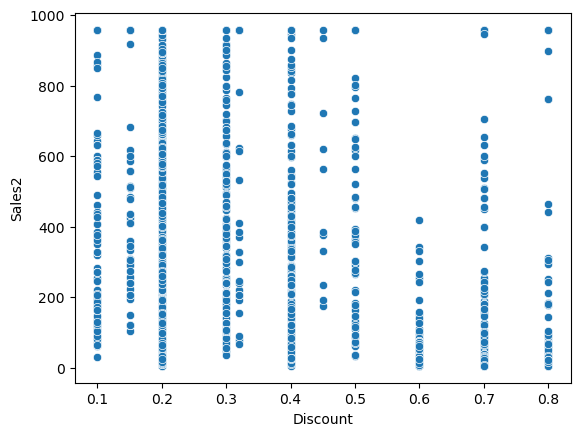

In [27]:
sns.scatterplot(x = df_discount['Discount'], y = df_discount['Sales2']);

#pertama kita visualisasikan dengan scatterplot untuk melihat apakah data linear. Terlihat data tidak linier maka digunakan metode spearman

In [26]:
df_discount['Discount'].corr(df_discount['Sales2'], method= 'spearman')

-0.17490880774340786

Hasil uji korelasi menunjukkan arah hubungan negatif atas diskon dan penjualan, karena in korelasi kita tidak dapat mengetahui variabel apa mempengaruhi apa. Serta hasil menunjukkan korelasi kuat

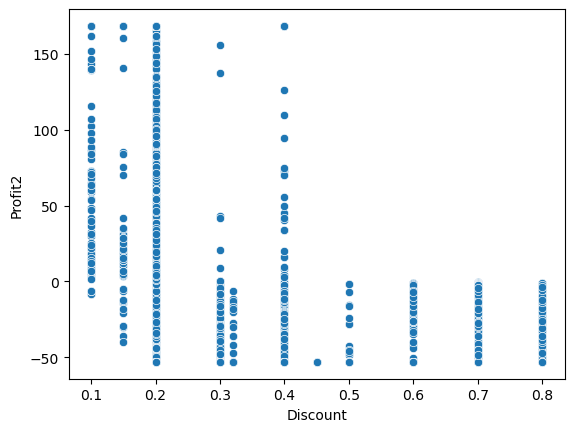

In [29]:
sns.scatterplot(x = df_discount['Discount'], y = df_discount['Profit2']);

#pertama kita visualisasikan dengan scatterplot untuk melihat apakah data linear. Terlihat data tidak linier maka digunakan metode spearman

In [28]:
df_discount['Discount'].corr(df_discount['Profit2'], method= 'spearman')

-0.6364996047238529

Hasil uji korelasi menunjukkan arah hubungan negatif atas diskon dan profit, karena in korelasi kita tidak dapat mengetahui variabel apa mempengaruhi apa. Serta hasil menunjukkan korelasi sangat kuat

In [49]:
crosstab_qty_disc = pd.crosstab(df_discount['Discount'], df_discount['Quantity'])
crosstab_qty_disc

Quantity,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Discount,,,,,,,,,,,,,,
0.10,9,29,17,7,11,7,5,1,3,1,2,0,0,2
0.15,4,16,12,3,8,2,2,2,1,1,0,0,1,0
0.20,324,911,917,433,405,216,210,94,85,20,12,9,11,10
0.30,17,61,48,27,35,14,14,4,5,1,0,0,0,1
0.32,3,6,6,4,2,1,3,0,1,1,0,0,0,0
0.40,20,52,53,23,18,8,12,8,6,2,0,2,1,1
0.45,1,1,3,2,1,1,2,0,0,0,0,0,0,0
0.50,9,10,16,8,13,5,4,0,1,0,0,0,0,0
0.60,10,34,38,11,27,6,6,2,4,0,0,0,0,0


In [39]:
# Grouping by product agregat sum
product_group = df_discount.groupby('Product')[['Sales2', 'Quantity', 'Profit2']].sum().reset_index().sort_values(by='Quantity', ascending=False)
product_group

,Product,Sales2,Quantity,Profit2
3,ContactMatcher,202430.7150,5614,-2188.4061
5,FinanceHub,204750.2155,2271,7029.8829
13,Support,33402.0620,2196,8191.0236
11,Site Analytics,177725.9455,2187,12422.1461
9,SaaS Connector Pack,30233.3535,1400,-761.3219
4,Data Smasher,46864.5490,1141,5928.5388
7,Marketing Suite - Gold,61760.5885,1114,-2116.9998
2,ChatBot Plugin,9024.4695,1096,1147.1864
8,OneView,28327.3115,708,731.0768
6,Marketing Suite,65902.2307,657,-1616.4592


In [54]:
#Setelah mengetahui terdapat korelasi kuat antar diskon dengan sales dan profit maka coba dilakukan uji regresi

# Menyiapkan data untuk regresi linier
X = df_discount['Discount']
y = df_discount['Quantity']

# Menambahkan konstanta ke model (intercept)
X = sm.add_constant(X)

# Melakukan regresi linier
model = sm.OLS(y, X).fit()

# Melihat ringkasan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.270
Date:                Wed, 10 Jul 2024   Prob (F-statistic):             0.0388
Time:                        22:47:03   Log-Likelihood:                -11516.
No. Observations:                5196   AIC:                         2.304e+04
Df Residuals:                    5194   BIC:                         2.305e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6760      0.056     65.338      0.0

Diskon (Discount) memiliki pengaruh negatif yang signifikan terhadap penjualan (Sales2). Artinya, semakin besar diskon yang diberikan, semakin rendah penjualan yang diperoleh.

In [52]:
# Menyiapkan data untuk regresi linier
X = df_discount['Discount']
y = df_discount['Sales2']

# Menambahkan konstanta ke model (intercept)
X = sm.add_constant(X)

# Melakukan regresi linier
model = sm.OLS(y, X).fit()

# Melihat ringkasan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Sales2   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     102.5
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           7.23e-24
Time:                        22:42:22   Log-Likelihood:                -36281.
No. Observations:                5196   AIC:                         7.257e+04
Df Residuals:                    5194   BIC:                         7.258e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.3429      6.608     36.218      0.0

Diskon (Discount) memiliki pengaruh positif yang signifikan terhadap kuantitas (Quantity). Artinya, semakin besar diskon yang diberikan, semakin besar kuantitas yang terjual, meskipun efeknya sangat kecil.

Dari grafik-grafik di atas, kita bisa menjawab pertanyaan:
* Apakah terdapat hubungan antara diskon dan sales/profit?
    * Ya ada hubungan yang cukup kuat diuji korelasinya dengan metode spearman. Menggunakan uji regresi juga menghasilkan nilai yang sama pengaruh negatif namun ditemukan pengaruh sangat kecil.
* Apakah terdapat hubungan antara diskon dan quantity?
    * Ya ada hubungan tapi lemah diuji korelasinya dengan metode spearman. Menggunakan uji regresi juga menghasilkan nilai yang sama pengaruh positif dan efek sangat kecil.

Secara keseluruhan model yang menguji pengaruh diskon terhadap kenaikan atau penurunan sales, profit, maupun quantity sangat lemah sehingga tidak banyak yang bisa didapat dari pengujian ini. Disarankan untuk menambah variabel agar model lebih kuat.